In [23]:
# Код нейронной сети в Keras!
###############################
import numpy as np
import pandas as pd

#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical

In [24]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# можно брать mnist из специальной библиотеки
# train_images = fashion_mnist.train_images()
#train_labels = fashion_mnist.train_labels()
#test_images = fashion_mnist.test_images()
#test_labels = fashion_mnist.test_labels()

# print(train_images.shape)
# приведем изображение к диапазону (-1,1).
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

4431872/4422102 [==============================] - 0s 0us/step


In [25]:
import matplotlib.pyplot as plt

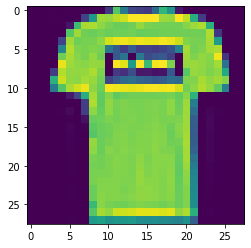

0


In [26]:
plt.imshow(train_imagesi[1,:,:])
plt.show()
print(train_labels[2])

In [27]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Создание Модели

In [28]:
# res = pd.DataFrame(columns=('name','epochs','n','optimizer', 'hid_layer', 'train_accuracy','test_accuracy'))
# res

,name,epochs,n,optimizer,hid_layer,train_accuracy,test_accuracy


In [30]:
y_t = to_categorical( train_labels)
y_tt = to_categorical(test_labels)

In [31]:
lay = np.arange(1, 11)
# N = np.arange(10, 101, 10)
# N = [10, 50 , 100]
N = [10]
# EPOCHS = [5,15]
EPOCHS = [5]
# N = [1]
for k in N:
  model1 = Sequential(name='10_lay_my_model'+ f'_{k}')
  model1.add(Dense( 128, activation='relu', input_shape=(784,)))  
  # входной слой + поносвязный слой из 128 нейронов с активацией ReLU

  model1.add(Dense(k, activation='tanh')) 
  model1.add(Dense(k, activation='tanh')) 
  model1.add(Dense(k, activation='tanh')) 
  model1.add(Dense(k, activation='tanh')) 
  model1.add(Dense(k, activation='tanh'))
  model1.add(Dense(k, activation='tanh'))
  model1.add(Dense(k, activation='tanh'))
  model1.add(Dense(k, activation='tanh'))
  model1.add(Dense(k, activation='tanh'))
  model1.add(Dense(k, activation='tanh'))
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

  model1.add(Dense(10, activation='softmax')) 
  # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # for i_optim in ['SGD','RMSProp','adam','NAdam']:
  for i_optim in ['adam']:
    model1.compile(
      optimizer= i_optim, # оптимизатор
      loss='binary_crossentropy', # функция потерь
      metrics=['accuracy'], # метрика
    ) 
    # Train the model.
    for ep in EPOCHS:
      model1.fit(  
        train_images,

        y_t,
        epochs= ep,
        batch_size=32, validation_split=0.2
      )

      # Evaluate the model.
      model1.evaluate( 
        test_images,
        y_tt
      )
      res.loc[len(res.index)] = [model1.name,
                                 ep,
                                 k, 
                                i_optim,
                                10,
                                round(model1.evaluate(train_images,y_t)[1],4),
                                round(model1.evaluate(test_images, y_tt)[1],4) ]
      print(res)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2752 - accuracy: 0.4057 - val_loss: 0.2105 - val_accuracy: 0.5758
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1784 - accuracy: 0.6056 - val_loss: 0.1603 - val_accuracy: 0.6264
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1648 - accuracy: 0.5907 - val_loss: 0.1792 - val_accuracy: 0.5875
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1608 - accuracy: 0.6130 - val_loss: 0.1496 - val_accuracy: 0.6415
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1522 - accuracy: 0.6244
                 name epochs   n  ... hid_layer train_accuracy  test_accuracy
0  10_lay_my_model_10      5  10  ...        10         0.6273         0.6244

[1 rows x 7 columns]


In [ ]:
res

In [2]:
# res.to_csv('result.csv')
from google.colab import files
res_csv = files.upload()

Saving result.csv to result.csv


In [3]:
import pandas as pd
res = pd.read_csv('result.csv', index_col=0)

In [13]:
res.head(-5)

,name,epochs,n,optimizer,hid_layer,train_accuracy,test_accuracy
0,1_lay_my_model_10,5,10,SGD,1,0.6919,0.6790
1,1_lay_my_model_10,15,10,SGD,1,0.8267,0.8143
2,1_lay_my_model_10,5,10,RMSProp,1,0.8753,0.8533
3,1_lay_my_model_10,15,10,RMSProp,1,0.9078,0.8695
4,1_lay_my_model_10,5,10,adam,1,0.9130,0.8753
...,...,...,...,...,...,...,...
86,10_lay_my_model_50,5,50,NAdam,10,0.8999,0.8634
87,10_lay_my_model_50,15,50,NAdam,10,0.9049,0.8721
88,10_lay_my_model_100,5,100,SGD,10,0.8057,0.7928
89,10_lay_my_model_100,15,100,SGD,10,0.8808,0.8585


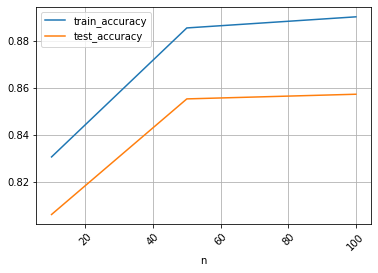

In [18]:
res.groupby('n')[['train_accuracy', 'test_accuracy']].mean().plot(grid=True, rot= 45)

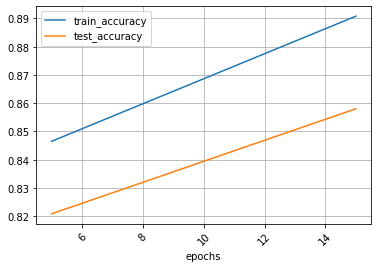

In [17]:
res.groupby('epochs')[['train_accuracy', 'test_accuracy']].mean().plot(grid=True, rot= 45)

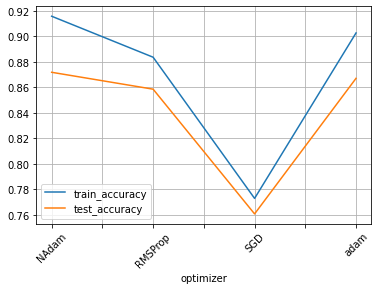

In [16]:
res.groupby('optimizer')[['train_accuracy', 'test_accuracy']].mean().plot(grid=True, rot= 45)

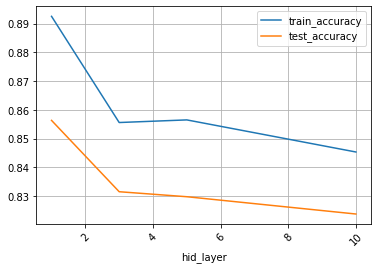

In [15]:
res.groupby('hid_layer')[['train_accuracy', 'test_accuracy']].mean().plot(grid=True, rot= 45)

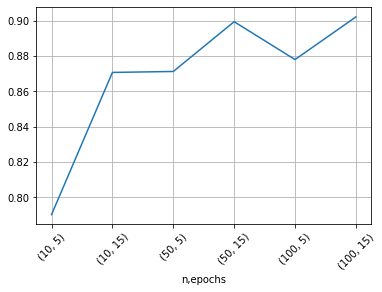

In [21]:
res.groupby(['n', 'epochs'])['train_accuracy'].mean().plot(grid=True, rot= 45)

По графикам можно увидеть, что нарезультат влияют (n)- кол-во нейронов в слое, чем больше тем результат выше  
(epochs) кол-во итераций по данным, получилась  линейная зависимость , чем больше тем лучше  
среди оптимизаторов(optimizer) лучше всего себя показал Adam и NAdam,   на втором месте RMSProp ,  третье место по графику и совсем не самый лучший это SGD  
почему то кол-во слоев(hid_layer) чем больше тем хуже результат на тесте, хотя по таблице видно, что если слоев больше, то точность, после первого обучения сети сразу выше, возможно для хорошего результа нужно меньше итераций

In [33]:
pred = model1.predict(test_images)

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [46]:
y_pred = np.argmax(model1.predict(test_images), axis=1)
y_pred[:10]

array([9, 4, 1, 1, 4, 1, 4, 4, 7, 7])

In [47]:
CM = confusion_matrix(test_labels,y_pred)
print(CM)

[[910   0   1  28  45   0   5   0  11   0]
 [ 15 909   0  66   9   0   0   0   1   0]
 [ 35   0  18   8 932   0   1   0   6   0]
 [172   5   2 762  53   0   4   0   2   0]
 [ 47   0  17  20 904   0   8   0   4   0]
 [  2   0   8  33  12  19   2 857  10  57]
 [325   1  14  19 623   0   7   0  11   0]
 [  1   0   0   1   0   0   0 915   0  83]
 [ 12   0  55   6  35   1   3   5 882   1]
 [  3   0   0   6   3   0   0  69   1 918]]


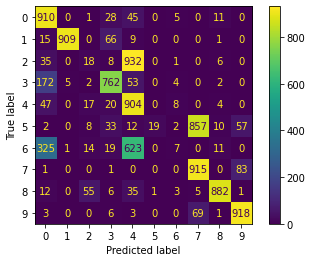

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot( values_format ='.3g')
plt.show()